#                               Stage B Assignment

## Objective:
* To answer questions posed by the Hamoye Examiner

In [1]:
#Changing the directory
%cd C:\Users\AKINKUNMI\Desktop\DataScience\Dataset

C:\Users\AKINKUNMI\Desktop\DataScience\Dataset


In [2]:
#Import the necessary libraries
import numpy as np #For numerical computation'''
import pandas as pd # For manipulation 
import matplotlib.pyplot as plt #For data visualization
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [3]:
#Load the dataset
try:
    #Store the dataset in the data variabel
    data = pd.read_csv('energydata_complete.csv', low_memory = False, index_col = False) 
    #Print the dimension of the dataset
    print('This dataset has {} rows and {} columns.'.format(*data.shape))
    print('I got it for you!!!!')
except:
    print('Oops... The dataset is missing')

This dataset has 19735 rows and 29 columns.
I got it for you!!!!


In [4]:
#Check the first three rows of the dataset
data.head(3)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [5]:
#Get the list of the columns
print(data.columns.tolist())

['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


In [6]:
#Check basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

We see from the above that there is no missing value in the dataset and all are integers and float type except date

In [7]:
data.shape #Check fot the dimension of the dataset

(19735, 29)

In [8]:
#Check basic Statistics
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


* we can see that the mean of Appliances (the target variable) is 97.7 and the STD is 102.5

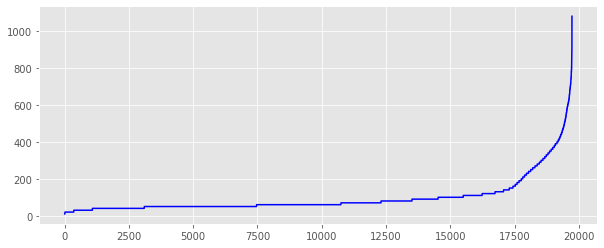

In [9]:
plt.rcParams['figure.figsize'] = (10, 4)
plt.style.use('ggplot')
plt.plot(sorted(data['Appliances']), color = 'blue')
plt.show()

In [10]:
#Check for the distribution of our dataset
#data.hist(figsize = (20, 14))

In [11]:
#To visualize out for skewness
#data.boxplot(figsize = (20, 13))

We see that most of the features are not normal distribution i.e Skewed
#Recommendation:
* Using log transformation
* Using Box cox
* Removing outliers (This will require to use percentile/quantile to determine outliers)

The correlation also be visualized below:


<function matplotlib.pyplot.show(*args, **kw)>

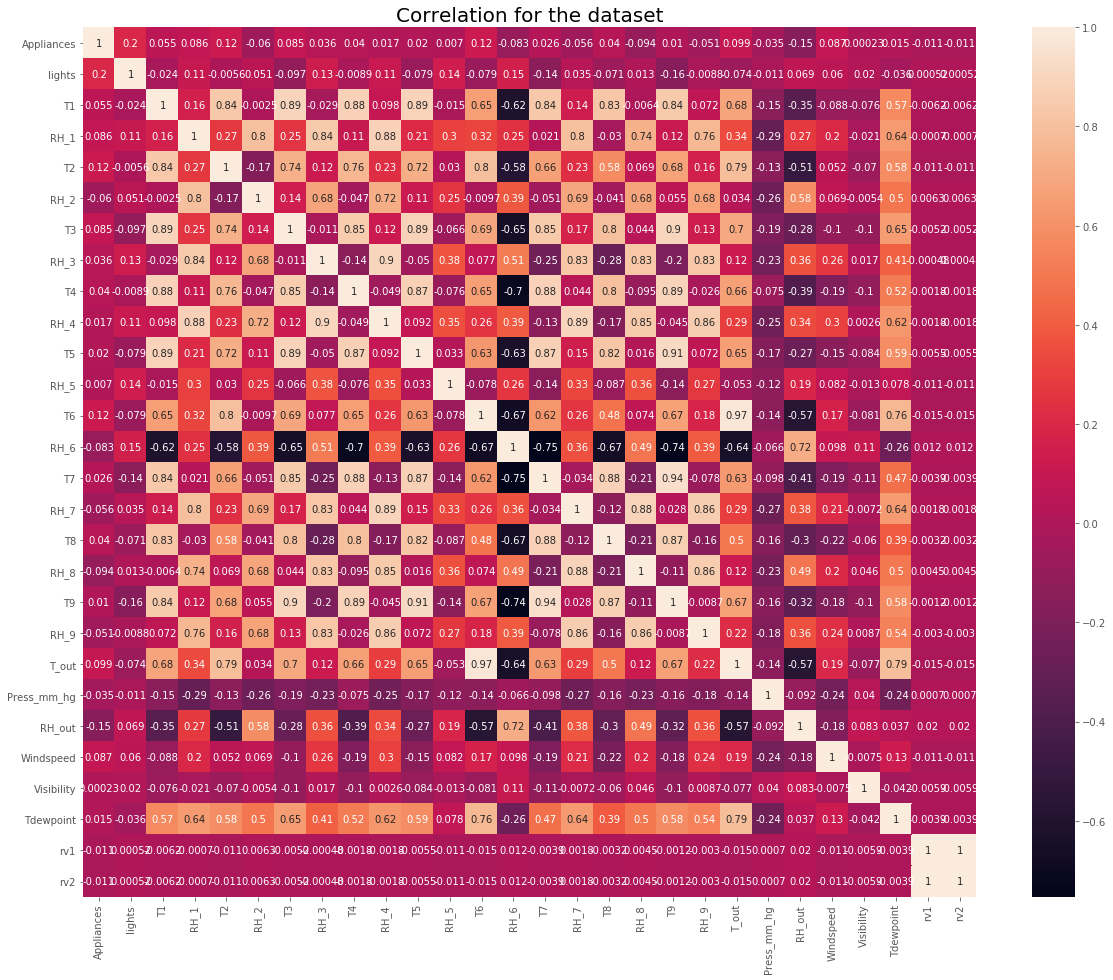

In [46]:
#Check out for multicolinearity
print('The correlation also be visualized below:')
plt.rcParams['figure.figsize'] = (20, 16)
plt.style.use('ggplot')
sns.heatmap(data.corr(), annot = True)
plt.title('Correlation for the dataset', fontsize = 20)
plt.show

In [13]:
#Create a new variable to work with
data_work = data.drop(columns = ['date', 'lights'], axis = 1)
data_work.head(n = 2)

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


In [14]:
#Remove the highly correlated feature above 75%
corr = data_work.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k =1).astype(np.bool))
to_drop = [column for column in upper.columns if any (upper[column]> 0.95)]
print(to_drop)
data_work2 = data_work.drop(columns = data_work[to_drop], axis = 1)

['T_out', 'rv2']


We have removed the highly correlated features in the dataset


Data Transformation to create normal distribution: Create a log-log transformation

In [22]:
'''Trying to convert the humidity columns to 
the nearest percent since it was measured in percent'''

humidity = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'RH_out']
humid_to_per =np.array(np.round((data_work2[humidity] * 1)), dtype = 'int')
humid_to_per = pd.DataFrame(humid_to_per, columns = humidity)
humid_to_per.head()


,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,RH_out
0,48,45,45,46,55,84,42,49,46,92
1,47,45,45,46,55,84,42,49,46,92
2,46,45,45,46,55,83,41,49,46,92
3,46,45,45,46,55,83,41,49,45,92
4,46,45,45,46,55,85,41,49,45,92


In [23]:
'''The next goal is to drop the initial columns
for humidity so we can make use of the "humid_to_per" dataframe'''
#New data to remove from the dataset
changed_columns = ['Appliances','RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8',
                   'RH_9', 'RH_out'] 
new_columns = data_work2.columns.tolist()
new_data = [x for x in new_columns if x not in changed_columns]
#Convert to dataframe
new_data2 = data_work2[new_data]
new_data = pd.DataFrame(new_data2, columns = new_data)
new_data.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,Press_mm_hg,Windspeed,Visibility,Tdewpoint,rv1
0,19.89,19.2,19.79,19.000000,17.166667,7.026667,17.200000,18.2,17.033333,733.5,7.000000,63.000000,5.3,13.275433
1,19.89,19.2,19.79,19.000000,17.166667,6.833333,17.200000,18.2,17.066667,733.6,6.666667,59.166667,5.2,18.606195
2,19.89,19.2,19.79,18.926667,17.166667,6.560000,17.200000,18.2,17.000000,733.7,6.333333,55.333333,5.1,28.642668
3,19.89,19.2,19.79,18.890000,17.166667,6.433333,17.133333,18.1,17.000000,733.8,6.000000,51.500000,5.0,45.410389
4,19.89,19.2,19.79,18.890000,17.200000,6.366667,17.200000,18.1,17.000000,733.9,5.666667,47.666667,4.9,10.084097


In [24]:
'''Aim here is to separate the features as well as transforming
some skewed columns of the humidity_to_per dataframe'''
#Separation of the Features
#transform the target feature
skewed_target = data_work2['Appliances'].apply(lambda x: np.log(1 + x))
#create a list of the columns
skewed_feature = ['RH_1', 'RH_5', 'RH_8', 'RH_9', 'RH_out']
#Create a log_level transformation
skewed_feature = humid_to_per[skewed_feature].apply(lambda x: np.log(1 + x))
#Drop the skewed columns from the original dataframe
Features =humid_to_per.drop(columns = ['RH_1', 'RH_8', 'RH_9', 'RH_out', 'RH_5'])
#Concat the dataframe
Features = pd.concat([new_data, Features], axis = 1)
new_feature = pd.concat([Features, skewed_feature], axis = 1)

In [25]:
'''The shape and the head() tells us we are on the right track'''
new_feature[0:5]

,T1,T2,T3,T4,T5,T6,T7,T8,T9,Press_mm_hg,...,RH_2,RH_3,RH_4,RH_6,RH_7,RH_1,RH_5,RH_8,RH_9,RH_out
0,19.89,19.2,19.79,19.000000,17.166667,7.026667,17.200000,18.2,17.033333,733.5,...,45,45,46,84,42,3.891820,4.025352,3.912023,3.850148,4.532599
1,19.89,19.2,19.79,19.000000,17.166667,6.833333,17.200000,18.2,17.066667,733.6,...,45,45,46,84,42,3.871201,4.025352,3.912023,3.850148,4.532599
2,19.89,19.2,19.79,18.926667,17.166667,6.560000,17.200000,18.2,17.000000,733.7,...,45,45,46,83,41,3.850148,4.025352,3.912023,3.850148,4.532599
3,19.89,19.2,19.79,18.890000,17.166667,6.433333,17.133333,18.1,17.000000,733.8,...,45,45,46,83,41,3.850148,4.025352,3.912023,3.828641,4.532599
4,19.89,19.2,19.79,18.890000,17.200000,6.366667,17.200000,18.1,17.000000,733.9,...,45,45,46,85,41,3.850148,4.025352,3.912023,3.828641,4.532599


## Feature Scaling

In [26]:
#Using MinMaxScaler to set the range of the values between 0 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit_transform(new_feature)
#Check the Scaler
normalized = pd.DataFrame(scaler, columns = new_feature.columns)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(normalized, skewed_target, test_size = 0.3, random_state = 42)
#Check the shape
print('The training set has: {} rows'.format(X_train.shape[0]))
print('The test_set has: {} rows'.format(X_test.shape[0]))

The training set has: 13814 rows
The test_set has: 5921 rows


Test a simple linear regression on the dataset!

In [28]:
#Fit linear regresion model
models = {'ridge':Ridge(alpha = 1), 'Lasso': Lasso(alpha = 0.5),'LinearRegression': LinearRegression()}

In [29]:
#Create a function to compute all necessary evaluations
def compute_score(models, X_train, X_test, y_train, y_test):
    model_properties = []
    for reg_name, regressor in models.items():
        reg_dict = {}
        reg_dict['Name'] = reg_name
        regressor.fit(X_train, y_train)
        reg_dict['MAE'] = round(mean_absolute_error(y_test, regressor.predict(X_test)),2)
        reg_dict['r2_Score'] = round(r2_score(y_test, regressor.predict(X_test)), 2)
        reg_dict['MSE'] = round(mean_squared_error(y_test, regressor.predict(X_test)), 3)
        reg_dict['RMSE'] = round(np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))), 3)
        model_properties.append(reg_dict)
        summary_df = pd.DataFrame(model_properties)
    return summary_df

In [30]:
compute_score(models, X_train, X_test, y_train, y_test)

,Name,MAE,r2_Score,MSE,RMSE
0,ridge,0.40,0.25,0.321,0.567
1,Lasso,0.49,-0.00,0.426,0.653
2,LinearRegression,0.40,0.25,0.321,0.567


### We can see that most of our models did not perform well. Let us try polynomial features by re-preprocess our features

In [31]:
#Preprocess the features to the third degree
polynomial_feature = PolynomialFeatures(degree = 3, include_bias = False)
#Create a new trainset and testset
X_train_poly = polynomial_feature.fit_transform(X_train)
X_test_poly = polynomial_feature.fit_transform(X_test)

In [32]:
#Invoke the functions to test our polynomial features
compute_score(models, X_train_poly, X_test_poly, y_train, y_test)

,Name,MAE,r2_Score,MSE,RMSE
0,ridge,0.31,0.53,0.199,0.446
1,Lasso,0.49,-0.00,0.426,0.653
2,LinearRegression,0.32,0.50,0.211,0.460


* #Let us see how we can improve the models with other non-linear algorithms

In [33]:
#Import non_linear algorithms from ensemble, trees and KNN
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor

In [34]:
#Create a dictionary to store the different learners
non_linear_models = {'KNeighbors_Reg':KNeighborsRegressor(), 'RandomForest_reg':RandomForestRegressor(),
                    'ExtraTreesRegressor':ExtraTreesRegressor(),
                     'GradientBoosting_reg':GradientBoostingRegressor(),
                    'DescisionTree_reg':DecisionTreeRegressor(),
                    'sgd_reg':SGDRegressor(max_iter = 100, penalty = None, eta0 = 0.02, fit_intercept = True)}

In [35]:
#Testing the non_linear learners
import time
def compute_score(models, X_train, X_test, y_train, y_test):
    model_properties = []
    for reg_name, regressor in non_linear_models.items():
        reg_dict = {}
        reg_dict['Name'] = reg_name
        start = time.time()
        regressor.fit(X_train, y_train.ravel())
        end = time.time()
        reg_dict['Train_time'] = end - start
        start = time.time()
        predict_train = regressor.predict(X_train)
        predict_test = regressor.predict(X_test)
        end = time.time()
        reg_dict['Pred_time'] = end - start
        reg_dict['Train_Score'] = regressor.score(X_train, y_train)
        reg_dict['Test_Score'] = regressor.score(X_test, y_test)
        reg_dict['MAE'] = round(mean_absolute_error(y_test, regressor.predict(X_test)),2)
        reg_dict['r2_Score'] = round(r2_score(y_test, regressor.predict(X_test)), 2)
        reg_dict['MSE'] = round(mean_squared_error(y_test, regressor.predict(X_test)), 3)
        reg_dict['RMSE'] = round(np.sqrt(mean_squared_error(y_test, regressor.predict(X_test))), 3)
        model_properties.append(reg_dict)
    summary_df = pd.DataFrame(model_properties)
    #lets plot the result
    summary_df.plot(x = 'Name', legend = 'reverse', kind = 'bar', figsize = (10, 10),
               title = 'Performance of the Learner')
    return summary_df

,Name,Train_time,Pred_time,Train_Score,Test_Score,MAE,r2_Score,MSE,RMSE
0,KNeighbors_Reg,0.608017,15.067345,0.700989,0.534874,0.30,0.53,0.198,0.445
1,RandomForest_reg,48.565890,1.109450,0.955649,0.695067,0.24,0.70,0.130,0.361
2,ExtraTreesRegressor,26.712126,1.140701,1.000000,0.731797,0.22,0.73,0.114,0.338
3,GradientBoosting_reg,10.266343,0.109377,0.398897,0.351102,0.36,0.35,0.277,0.526
4,DescisionTree_reg,0.734426,0.031256,1.000000,0.416353,0.30,0.42,0.249,0.499
5,sgd_reg,0.078136,0.015624,0.217406,0.226964,0.41,0.23,0.330,0.574


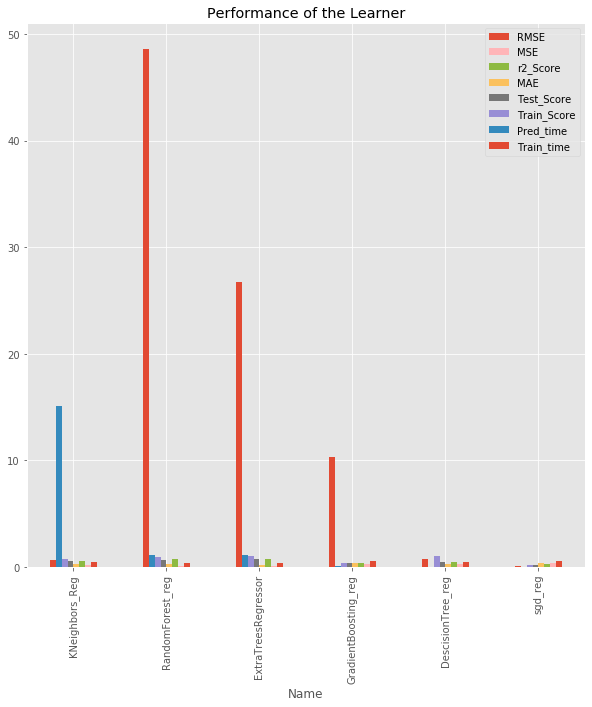

In [36]:
#invoke the function and visualize the best performming algorithm
compute_score(models, X_train, X_test, y_train, y_test)

It seems the Extra Trees Learner is promising using the criteria above. 
* It shows that 74% of the variance in our dependent variable is explained by the features. 
* It has the lowest MAE, MSE and RMSE
* The time for prediction is better compare to others
## let us see if we can optimize the learner than here:

In [37]:
#Import gridsearch
from sklearn.model_selection import GridSearchCV
#Define the param_grid
param_grid = [{'max_depth': [50, 100, 200], 'n_estimators': [10, 50, 100, 200], 'max_features': ['auto', 'sqrt', 'log2']}]
Extra_tree = ExtraTreesRegressor(random_state = 42)

In [38]:
#import datetime
from datetime import datetime
start_time = datetime.now()
grid_search = GridSearchCV(Extra_tree, param_grid, cv = 5, n_jobs = -1, scoring ='r2')
#Fit the gridsearch to the trainset
grid_search.fit(X_train, y_train)
print(datetime.now() - start_time)

0:17:18.030950


We see that the hyperparameter used over 17mins to bring out the best parameters. This is viewed below:

In [39]:
#View the best parameter
print('The best hyperparameters {}:'.format(grid_search.best_params_))

The best hyperparameters {'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 200}:


In [40]:
#get the best_estimator for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(r2_score(y_test, y_pred))

0.7366646009703455


We see that there is a very little improvement in the prediction

### let us try another Model based on Feature importance:

In [41]:
#Get sorted list of features in order of importance
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

In [42]:
#Getting the best features for re_modelling
feature_importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(feature_importances)[::-1]
names = [X_train.columns[i] for i in indices]
names[0:10]

['T2',
 'T6',
 'RH_8',
 'T3',
 'RH_out',
 'Press_mm_hg',
 'T8',
 'RH_6',
 'Tdewpoint',
 'RH_1']

In [43]:
#Reduce test and training set to 10 features
new_trainset = X_train[names[0:10]]
new_testset = X_test[names[0:10]]

In [44]:
#import clone
from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(new_trainset, y_train)

ExtraTreesRegressor(max_depth=50, max_features='sqrt', n_estimators=200,
                    random_state=42)

In [45]:
y_hat = cloned_model.predict(new_testset)
r2 = r2_score(y_test, y_hat)
r2

0.7280756288385049

## Based on this result, it is better to use the model built with the hyperparameters with 74% accuracy

QUIZ QUESTIONS:
* (1) In linear regression, L2 regularization is equivalent to imposing a:
* Answer: Gaussian Prior
* (2) Cross Validation is guaranteed to prevent overfitting
* (3) Ridge regression reduces variance at the expense of higher bias
* (4) In the different terms of the bias-tradeoff, which of the following is substantially more harmful to the test error than the training error
* Answer: Variancee
* (5) What can you use to find the best fit line for linear regression?
* Answer: Least Square Error ---- The linear regresiion uses the least the square method as its cost function i.e reducing the distance between the actual value and the predicted value
*  (6) Which of the following is true about outliers in linear regression
* Answer: Linear regression is sensitive to outliers because it changes the slope or gradient of the regression line
* (7) How many coefficients do you need to estimate a simple linear regression(One independent variable?)
* Answer: (y = a + bx) where m and c are the coefficients of the regression
* (8) Adding more bias functions in a linear model decreases model bias
* (9) A best fit line relating X and Y has a R-squared value of 0.75%. How do I interpret this information?
* Answer: 75% of the variance in Y is explained by X
* (10) The lasso regression can be interpreted as least-squares regression where the weights are regularized with the L1 norm
* Multivariate normality is not part of the assumptioons of linear regression.